# **Clustering with Python Scikit Learn**
## Author: Uday Syed
   www.linkedin.com/in/uday-syed

### Importing Libraries
Make sure these libraries are preinstalled using conda or pip

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

### Converting the CSV file to a DataFrame

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Determing the optimum value of centeroids or clusters

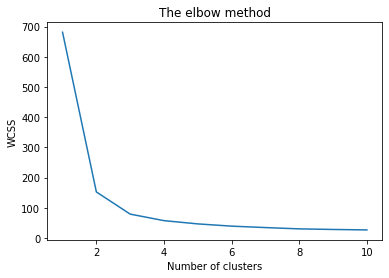

In [3]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values


from sklearn.cluster import KMeans
wcss = [] #the empty list will contain Sum of squared distances of samples to their closest cluster center

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** 3**'.

In [4]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)


#Values of cluster (cluster_centers_ndarray of shape (n_clusters, n_features))

#kmeans.cluster_centers_

x[:,:].shape

(150, 4)

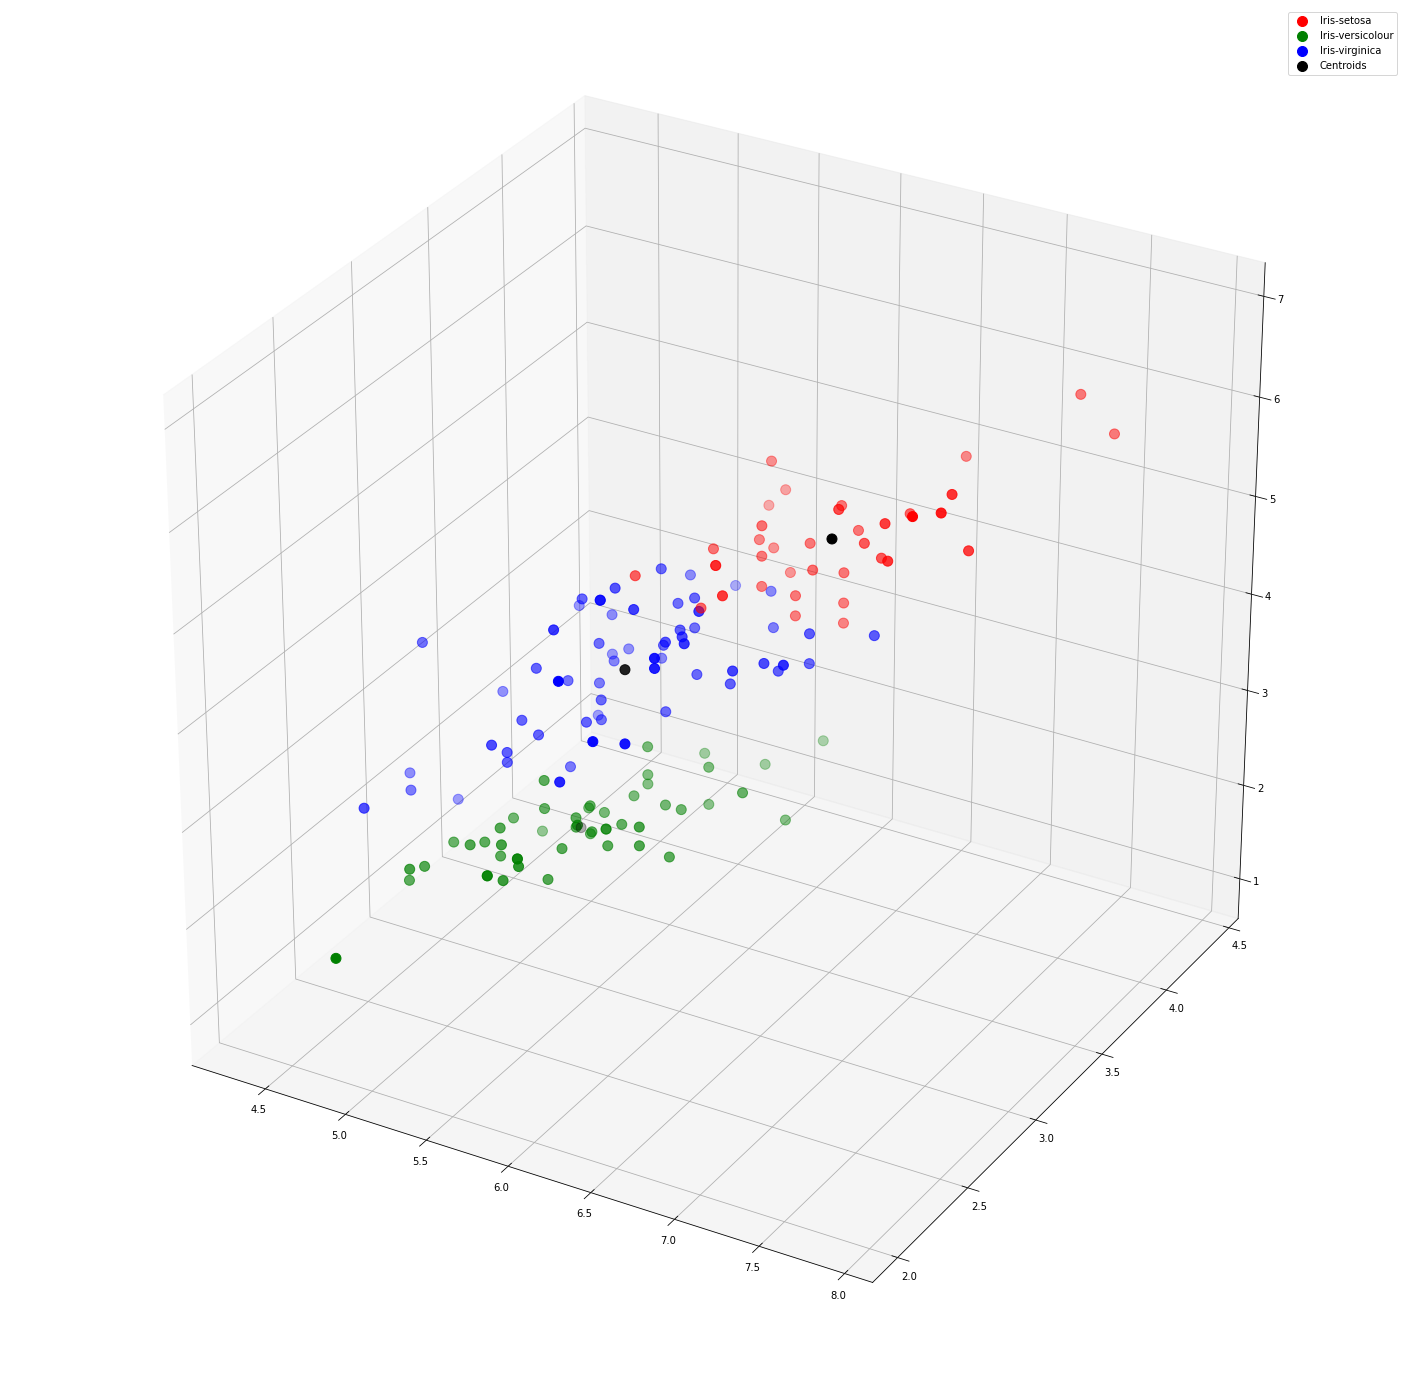

In [5]:
# Visualising the clusters - On the first three columns
fig=plt.figure(figsize=(25,25))
ax=fig.add_subplot(projection='3d')

ax.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], x[y_kmeans == 0, 2],
            s = 100, c = 'red', label = 'Iris-setosa')
ax.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], x[y_kmeans == 1, 2],
            s = 100, c = 'green', label = 'Iris-versicolour')
ax.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], x[y_kmeans == 2, 2],
            s = 100, c = 'blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()